In [7]:
import numpy as np
import pandas as pd
import os, cv2
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_lfw_people
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neural_network import MLPClassifier

In [22]:
def plot_gallery(images, titles, h, w, n_row=3, n_col=4):
    plt.figure(figsize=(1.8* n_col , 2.4 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
    for i in range(n_row, n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((h, w),), cmap=plt.cm.gray)
        plt.title(titles[i], size=12)
        plt.xticks(())
        plt.yticks(())

In [23]:
dir_name= "dataset/dataset/faces/"
y=[];x=[];target_names=[]
person_id = 0; h = w =300
n_samples=0
class_names=[]

for person_name in os.listdir(dir_name):
    dir_path = dir_name+person_name+"/"
    class_names.append(person_name)
    for image_name in os.listdir(dir_path):
        image_path = dir_path+image_name
        img = cv2.imread(image_path)
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        resized_image= cv2.resize(gray,(h,w))
        v=resized_image.flatten()
        x.append(v)
        n_samples =n_samples+1
        y.append(person_id)
        target_names.append(person_name)
    person_id = person_id + 1

In [24]:
y = np.array(y)
x = np.array(x)
target_names = np.array(target_names)
n_features = x.shape[1]
print(x.shape, y.shape, target_names.shape)
print('no of samples', n_samples)

(450, 90000) (450,) (450,)
no of samples 450


150 337


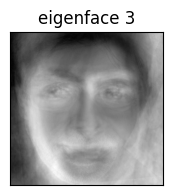

Projecting the input data on the eigenfaces orthonormal basis
(337, 150) (113, 150)


In [29]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)
n_components = 150
print(n_components, x_train.shape[0])
pca = PCA(n_components=n_components, svd_solver='randomized', whiten=True).fit(x_train)
eigenfaces = pca.components_.reshape((n_components, h, w))
eigenface_titles = ["eigenface %d" % i for i in range(eigenfaces.shape[0])]
plot_gallery(eigenfaces, eigenface_titles, h, w)
plt.show()

print("Projecting the input data on the eigenfaces orthonormal basis")
x_train_pca = pca.transform(x_train)
x_test_pca = pca.transform(x_test)
print(x_train_pca.shape, x_test_pca.shape)
lda = LinearDiscriminantAnalysis()
lda.fit(x_train_pca, y_train)

x_train_lda = lda.transform(x_train_pca)
x_test_lda = lda.transform(x_test_pca)

In [30]:
clf = MLPClassifier(random_state=1, hidden_layer_sizes=(10,10), max_iter=1000, verbose=True).fit(x_train_lda, y_train)
print("Model Weights:")
model_info = [coef.shape for coef in clf.coefs_]
print(model_info)

Iteration 1, loss = 3.02028177
Iteration 2, loss = 2.97086255
Iteration 3, loss = 2.92232737
Iteration 4, loss = 2.87333558
Iteration 5, loss = 2.82556187
Iteration 6, loss = 2.77922898
Iteration 7, loss = 2.73523491
Iteration 8, loss = 2.69021378
Iteration 9, loss = 2.64667106
Iteration 10, loss = 2.60517328
Iteration 11, loss = 2.56454378
Iteration 12, loss = 2.52526224
Iteration 13, loss = 2.48672305
Iteration 14, loss = 2.44871361
Iteration 15, loss = 2.41355751
Iteration 16, loss = 2.37750671
Iteration 17, loss = 2.34307181
Iteration 18, loss = 2.30915603
Iteration 19, loss = 2.27674708
Iteration 20, loss = 2.24573342
Iteration 21, loss = 2.21443423
Iteration 22, loss = 2.18429347
Iteration 23, loss = 2.15510627
Iteration 24, loss = 2.12651055
Iteration 25, loss = 2.09845024
Iteration 26, loss = 2.07138028
Iteration 27, loss = 2.04417583
Iteration 28, loss = 2.01794849
Iteration 29, loss = 1.99190472
Iteration 30, loss = 1.96649813
Iteration 31, loss = 1.94142314
Iteration 32, los

Accuracy : 63.716814159292035


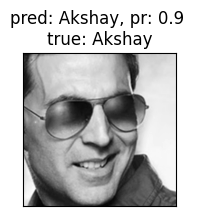

In [33]:
y_pred=[];y_prob=[]

for test_face in x_test_lda:
    prob = clf.predict_proba([test_face])[0]
    class_id = np.where(prob == np.max(prob))[0][0]
    y_pred.append(class_id)
    y_prob.append(np.max(prob))

y_pred = np.array(y_pred)


prediction_titles=[]
true_positive = 0
for i in range(y_pred.shape[0]):
    true_name = class_names[y_test[i]]
    pred_name = class_names[y_pred[i]]
    result = 'pred: %s, pr: %s \ntrue: %s' % (pred_name, str(y_prob[i]) [0:3], true_name)

    prediction_titles.append(result)

    if true_name == pred_name:
      true_positive = true_positive + 1
print('Accuracy :', true_positive*100/y_pred.shape[0])

plot_gallery(x_test, prediction_titles, h, w)
plt.show()